## Sea Level Prediction Based on Historical Data
These analyses were done for the 5th project of the Data Analysis with Python Certification series on FreeCodeCamp

#### Read the sea level data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_csv('./data/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Plot the data

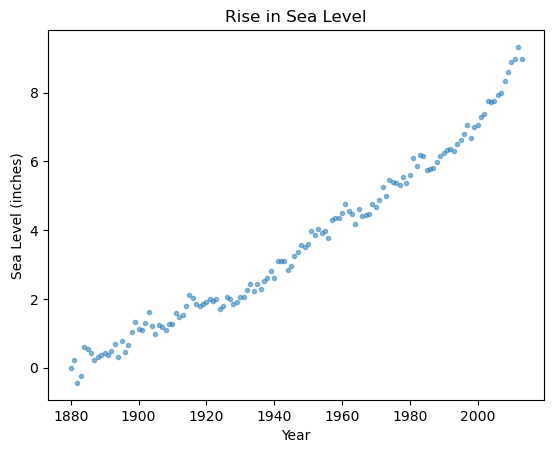

In [3]:
def plot_data():
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], marker='.', alpha=0.5)
    plt.ylabel('Sea Level (inches)')
    plt.xlabel('Year')
    plt.title('Rise in Sea Level')
plot_data()

#### Predict sea level data (fit linear reg)

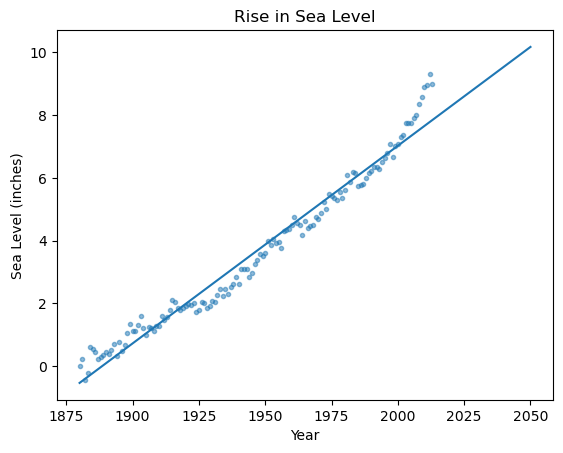

In [4]:
fit = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

def pred_value(year):
    return fit.intercept + fit.slope * year
    
years = pd.Series(range(1880,2051))

pred = pred_value(years)
plot_data()
plt.plot(years, pred)

#### Predict sea level based on most recent data only (2000 onward)

In [5]:
recent = df.loc[df['Year']>=2000]
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


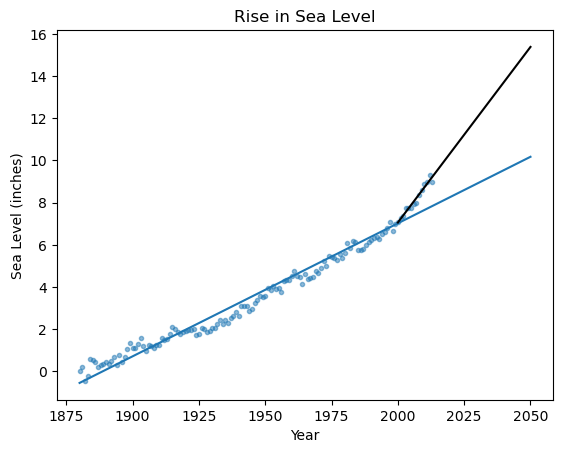

In [6]:
res = linregress(recent['Year'], recent['CSIRO Adjusted Sea Level'])
def pred_value_recent(year):
    return res.intercept + res.slope * year
    
years_recent = pd.Series(range(2000,2051))

pred_recent = pred_value_recent(years_recent)
plot_data()
plt.plot(years, pred)
plt.plot(years_recent, pred_recent, color='black')


